# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [24]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [25]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [26]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

#### Con base en la descripción de los datos, responda las siguientes preguntas:

1. ¿Cuántos atributos hay en los datos? ¿Qué quieren decir? Tenemos 10 atributos(edad, sexo, indice de masa corporal, presión alterial...) Son valores predictivos, valores cuantitativos. 10 columnas con valores predictivos numéricos. Variables Dependientes

1. ¿Cuál es la relación entre `diabetes['data']` y `diabetes['target']`? Pues la relación que hay entre ellas son que son los mismos datos que vamos a relacionar, sólo que el target contiene una variable o atributo independiente que el otro no tiene, que nos permitirá sacar conclusiones o predicciones. En este caso concreto la variable independiente es la columna 11 que será una media cuantitativa de la progresión de la enfermedad un año después de su inicio.

1. ¿Cuántos registros hay en los datos? Hay 442 registros de 442 pacientes diabéticos.

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [27]:
df_diabetes = pd.DataFrame(data = diabetes['data'],columns = diabetes['feature_names'])

In [28]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [29]:
df_diabetes.shape

(442, 10)

In [30]:
diabetes_target = diabetes['target']

In [31]:
diabetes_target.shape

(442,)

In [16]:
# diabetes_target

## Buliding a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [32]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [33]:
diabetes_model = LinearRegression()
print(diabetes_model)
print(type(diabetes_model))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [34]:
df_diabetes.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [35]:
df_dia_cop = df_diabetes.copy()

df_dia_cop = df_dia_cop[['age', 'sex', 'bmi', 'bp', 's1', 's2',
                's3', 's4', 's5', 's6']]

In [37]:
X_diabetes_data_train = df_dia_cop.iloc[:-20]
X_diabetes_data_test = df_dia_cop.iloc[-20:]
y_diabetes_target_train = diabetes_target[:-20]
y_diabetes_target_test = diabetes_target[-20:]

In [38]:
print(f"X_train: {X_diabetes_data_train.shape}\ty_train: {y_diabetes_target_train.shape}")
print(f"X_test: {X_diabetes_data_test.shape}\ty_test: {y_diabetes_target_test.shape}")

X_train: (422, 10)	y_train: (422,)
X_test: (20, 10)	y_test: (20,)


In [51]:
df_graf = df_diabetes.copy()

In [53]:
df_graf['target'] = diabetes_target

<AxesSubplot:>

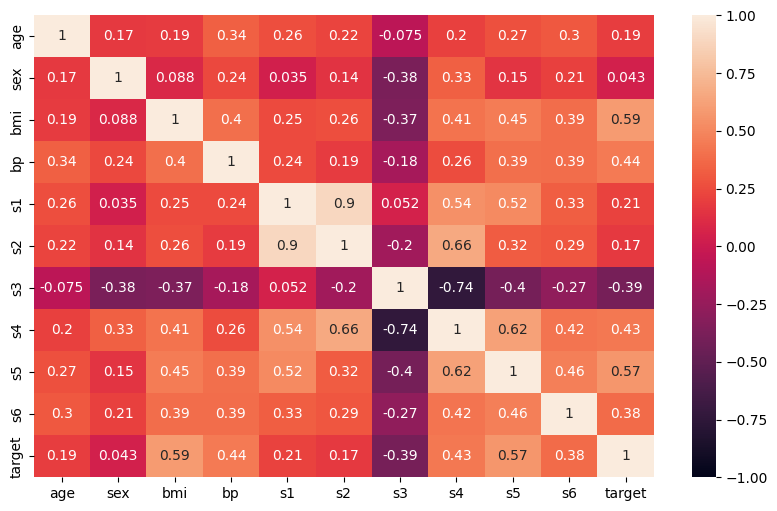

In [56]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_graf.corr(), vmin = -1, vmax = 1, annot = True)

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [39]:
diabetes_model.fit(X_diabetes_data_train, y_diabetes_target_train)

LinearRegression()

In [40]:
cols = X_diabetes_data_train.columns
params = diabetes_model.coef_
inter = diabetes_model.intercept_

In [41]:
print(diabetes_model.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [42]:
print(diabetes_model.intercept_)

152.76430691633442


In [43]:
df_params = pd.DataFrame({'Variable': cols, 'Coef': params, 'Intercept': inter})
df_params

,Variable,Coef,Intercept
0,age,0.303500,152.764307
1,sex,-237.639315,152.764307
2,bmi,510.530605,152.764307
3,bp,327.736980,152.764307
4,s1,-814.131709,152.764307
5,s2,492.814588,152.764307
6,s3,102.848452,152.764307
7,s4,184.606489,152.764307
8,s5,743.519617,152.764307
9,s6,76.095172,152.764307


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [44]:
y_hat = diabetes_model.predict(X_diabetes_data_test)
y_hat

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

#### Print your `diabetes_target_test` and compare with the prediction. 

Imprime tu `diabetes_target_test` y compáralo con la predicción.

In [45]:
print(y_diabetes_target_test)

[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


#### Is `diabetes_target_test` exactly the same as the model prediction?

Is `diabetes_target_test` exactly the same as the model prediction?

In [46]:
res = y_diabetes_target_test - y_hat

Text(0.5, 1.0, 'Distribucion de los residuos')

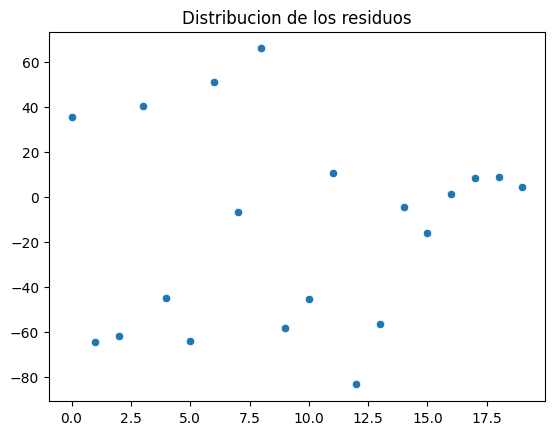

In [57]:
sns.scatterplot(res)
plt.title("Distribucion de los residuos")

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_diabetes_target_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_diabetes_target_test, y_hat))
r2 = r2_score(y_diabetes_target_test, y_hat)

print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)

MAE: 36.610175567158834
RMSE: 44.77239777686495
R^2: 0.5850753022690574


#### Which are the most important features?

La más importante parece ser la S5, aunque nuestro modelo predictivo no es muy fiable por lo que se ve.

<AxesSubplot:>

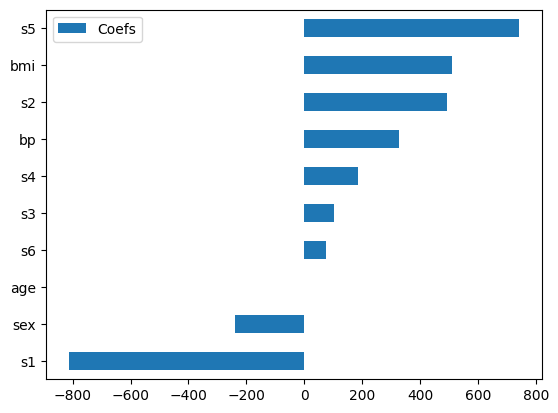

In [48]:
df_res = pd.DataFrame(diabetes_model.coef_,
                    index = X_diabetes_data_train.columns,
                    columns = ["Coefs"])


df_res.sort_values(by = 'Coefs').plot(kind = 'barh')